# Explore here

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()



True

In [4]:
pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [6]:
url_shakira = "https://open.spotify.com/intl-es/artist/0EmeFodog0BfCgMzAIvKQp"



In [8]:
# → Devuelve las canciones más populares del artista en un país específico.
top_track = spotify.artist_top_tracks("0EmeFodog0BfCgMzAIvKQp", country='ES')
for track in top_track['tracks'][:10]:
    print(track['name'], track['popularity'])

Hips Don't Lie (feat. Wyclef Jean) 86
TQG 80
Chantaje (feat. Maluma) 81
La Tortura (feat. Alejandro Sanz) 80
Soltera 80
Can't Remember to Forget You (feat. Rihanna) 79
GIRL LIKE ME 78
Whenever, Wherever 77
Antología 78
Ciega, Sordomuda 77


In [14]:
# convertir a dataframe
data = []
for track in top_track['tracks']:
    data.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'album': track['album']['name'],
        'duration_ms': track['duration_ms'],
       
    })
df = pd.DataFrame(data)
df.head(10)

,name,popularity,album,duration_ms
0,Hips Don't Lie (feat. Wyclef Jean),86,"Oral Fixation, Vol. 2 (Expanded Edition)",220360
1,TQG,80,MAÑANA SERÁ BONITO,197933
2,Chantaje (feat. Maluma),81,El Dorado,195840
3,La Tortura (feat. Alejandro Sanz),80,Fijación Oral Volumen 1 (Expanded Edition),216225
4,Soltera,80,Soltera,214642
5,Can't Remember to Forget You (feat. Rihanna),79,Shakira. (Expanded Edition) [Spanish Version],206866
6,GIRL LIKE ME,78,TRANSLATION,222522
7,"Whenever, Wherever",77,Laundry Service,196160
8,Antología,78,Pies Descalzos,254240
9,"Ciega, Sordomuda",77,Donde Estan Los Ladrones,267826


In [27]:
# ordenarlo por popularidad
df_popularity = df.sort_values(by='popularity', ascending=True).reset_index(drop=True)
df_popularity = pd.DataFrame(df_popularity)
df_popularity.head(3)

,name,popularity,album,duration_ms
0,"Whenever, Wherever",77,Laundry Service,196160
1,"Ciega, Sordomuda",77,Donde Estan Los Ladrones,267826
2,Antología,78,Pies Descalzos,254240


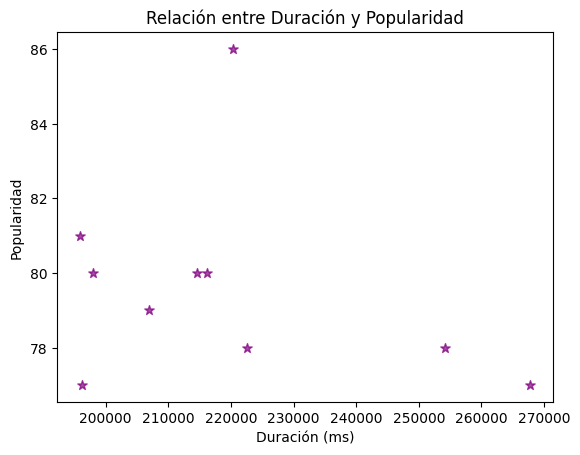

In [28]:
x = df['duration_ms']
y = df['popularity']

fig, ax = plt.subplots()
ax.scatter(x,y, 
           color='purple', # Color de puntos
           s=50,           # Tamaño de puntos
           alpha=0.7,      # Transparencia
           marker='*')     # Forma del marcador
ax.set_title('Relación entre Duración y Popularidad')
ax.set_xlabel('Duración (ms)')
ax.set_ylabel('Popularidad')
plt.show()

# EN EL GRÁFICO SE PUEDE APRECIAR QUE NO TIENE RELACIÓN LA DURACIÓN CON LA POPULARIDAD, YA QUE LAS CANCIONES CON MAS DURACIÓN NO SON LAS MAS POPULARES 